In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [52]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [53]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


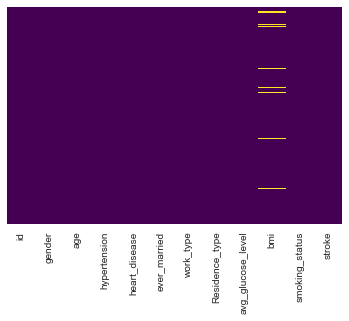

In [54]:
sns.heatmap(df.isnull(), cmap ='viridis', cbar=False, yticklabels=False)

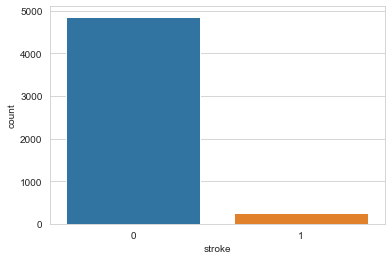

In [55]:
sns.countplot(data=df, x='stroke')

In [56]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

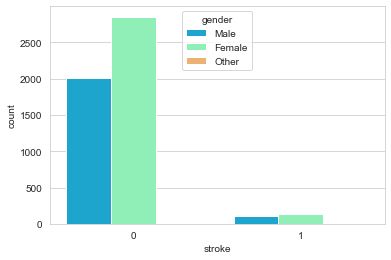

In [57]:
sns.countplot(data=df, x='stroke', hue='gender', palette='rainbow')

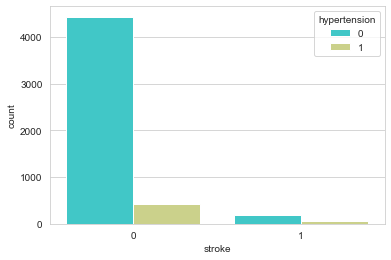

In [58]:
sns.countplot(data=df, x='stroke', hue='hypertension', palette='rainbow')

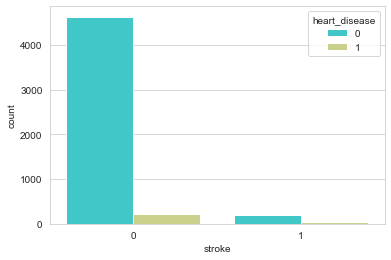

In [59]:
sns.countplot(data=df, x='stroke', hue='heart_disease', palette='rainbow')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


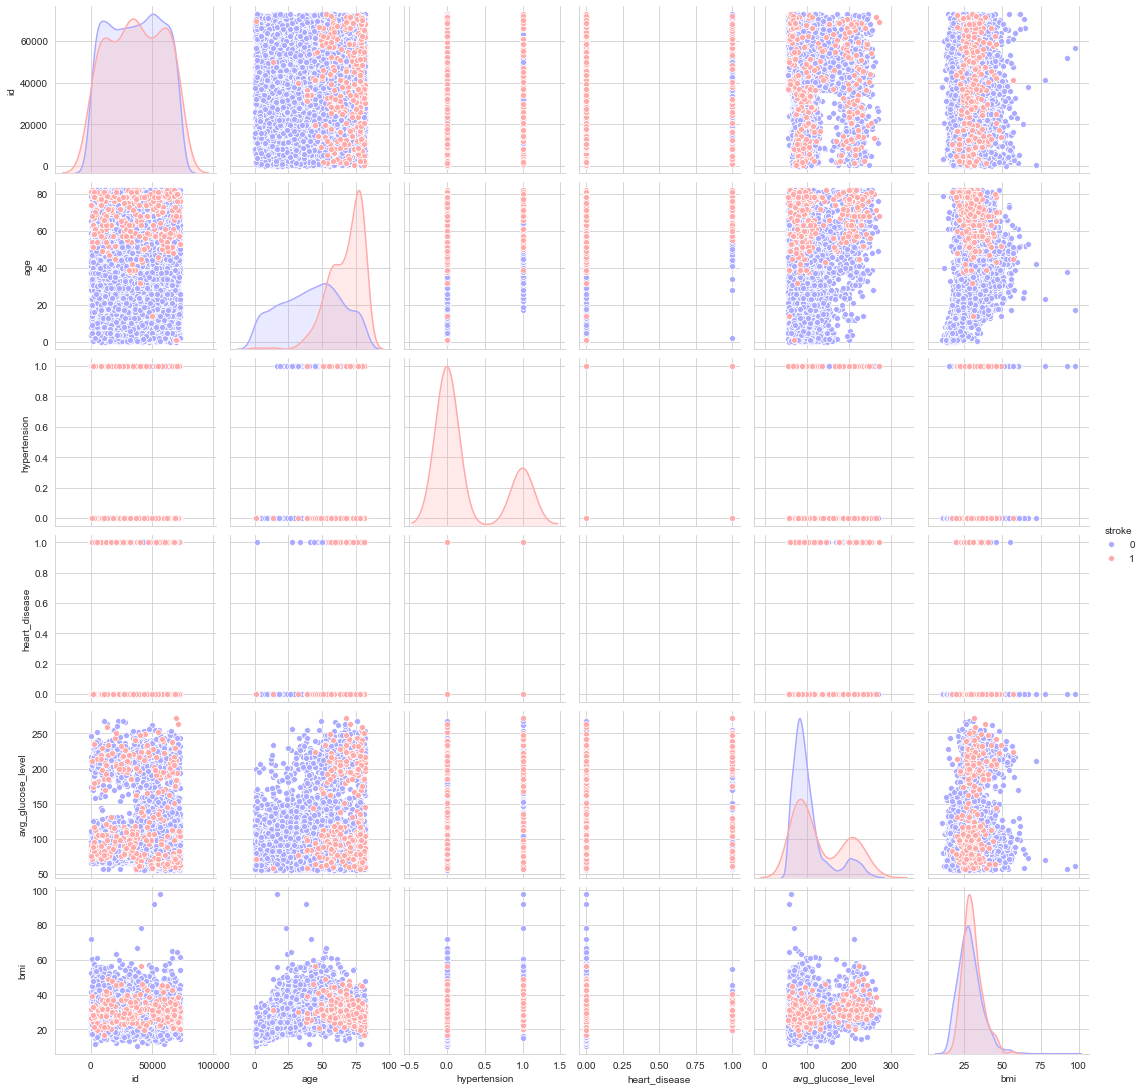

In [60]:
sns.pairplot(df, hue='stroke', palette='bwr')

In [63]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

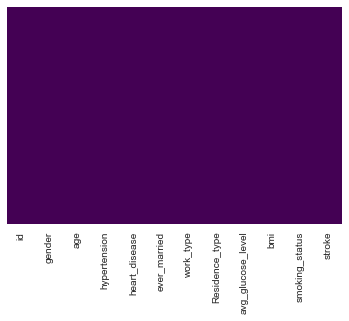

In [64]:
sns.heatmap(df.isnull(), cmap ='viridis', cbar=False, yticklabels=False)

In [65]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
Gen = pd.get_dummies(df['gender'], drop_first=True)
Married = pd.get_dummies(df['ever_married'], drop_first=True)
Work = pd.get_dummies(df['work_type'], drop_first=True)
Res = pd.get_dummies(df['Residence_type'], drop_first=True)
Smoking = pd.get_dummies(df['smoking_status'], drop_first=True)
# pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [68]:
df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)

In [69]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1


In [70]:
df = pd.concat([df, Gen, Married, Work, Res, Smoking], axis=1)

In [71]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [20]:
df.drop(['id'], axis=1, inplace=True)

In [21]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


# We have an imbalanced data set here. To make it a balanced data set, we can make use of undersampling

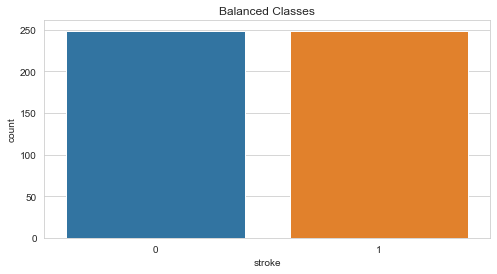

In [74]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the yes stroke class in a separate dataset.
str_yes_df = shuffled_df.loc[shuffled_df['stroke'] == 1]

#Randomly select 249 observations from the no stroke (majority class)
str_no_df = shuffled_df.loc[shuffled_df['stroke'] == 0].sample(n=249,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([str_yes_df, str_no_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 4))
sns.countplot('stroke', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [23]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 236 to 1255
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                498 non-null    float64
 1   hypertension       498 non-null    int64  
 2   heart_disease      498 non-null    int64  
 3   avg_glucose_level  498 non-null    float64
 4   bmi                498 non-null    float64
 5   stroke             498 non-null    int64  
 6   Male               498 non-null    uint8  
 7   Other              498 non-null    uint8  
 8   Yes                498 non-null    uint8  
 9   Never_worked       498 non-null    uint8  
 10  Private            498 non-null    uint8  
 11  Self-employed      498 non-null    uint8  
 12  children           498 non-null    uint8  
 13  Urban              498 non-null    uint8  
 14  formerly smoked    498 non-null    uint8  
 15  never smoked       498 non-null    uint8  
 16  smokes             498 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df.drop('stroke',axis=1), normalized_df['stroke'], test_size=0.30, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        69
           1       0.81      0.79      0.80        81

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,predictions)

0.7866666666666666

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,predictions)

array([[54, 15],
       [17, 64]], dtype=int64)

In [35]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 236 to 1255
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                498 non-null    float64
 1   hypertension       498 non-null    int64  
 2   heart_disease      498 non-null    int64  
 3   avg_glucose_level  498 non-null    float64
 4   bmi                498 non-null    float64
 5   stroke             498 non-null    int64  
 6   Male               498 non-null    uint8  
 7   Other              498 non-null    uint8  
 8   Yes                498 non-null    uint8  
 9   Never_worked       498 non-null    uint8  
 10  Private            498 non-null    uint8  
 11  Self-employed      498 non-null    uint8  
 12  children           498 non-null    uint8  
 13  Urban              498 non-null    uint8  
 14  formerly smoked    498 non-null    uint8  
 15  never smoked       498 non-null    uint8  
 16  smokes             498 

In [36]:
logmodel.classes_

array([0, 1], dtype=int64)

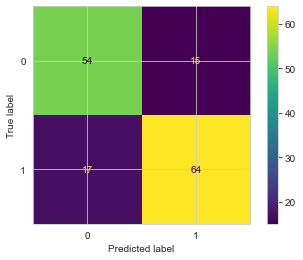

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()